# Linear Model Algorithm

## Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("../")

from src.linear_model import LinearRegression

## A. Linear Regression

In [10]:
X = np.array([[1, 1, 4, 10], [1, 2, 10, 11], [2, 2, 13, 15], [2, 3, 7, 9]])
y = np.dot(X, np.array([1, 2, 4, 4])) + 3

reg = LinearRegression(fit_intercept=True, optimizer="ols")
reg.fit(X, y)

print(f"y : {y}")
print(reg.coef_)
print(reg.intercept_)
print(reg.predict(np.array([[1,1,4,10]])))

reg = LinearRegression(fit_intercept=True, optimizer="gradient-descent", learning_rate=1e-3, num_iters=100000)
reg.fit(X, y)

print(f"y : {y}")
print(reg.coef_)
print(reg.intercept_)
print(reg.predict(np.array([[1,1,4,10]])))

y : [ 62  92 121  75]
[0.42251314 2.64165207 3.85028118 4.25666083]
0.9681017792938107
[62.]
Cost at iteration 0 is : 2481.147183140625
Cost at iteration 10000 is : 0.00906879256047869
Cost at iteration 20000 is : 0.0018207638924570735
Cost at iteration 30000 is : 0.0003655614277957406
Cost at iteration 40000 is : 7.339510523344765e-05
Cost at iteration 50000 is : 1.4735803787392548e-05
Cost at iteration 60000 is : 2.9585612360527404e-06
Cost at iteration 70000 is : 5.940011630051065e-07
Cost at iteration 80000 is : 1.192597865995715e-07
Cost at iteration 90000 is : 2.3944223656551034e-08
y : [ 62  92 121  75]
[0.42280784 2.64152134 3.85028112 4.2566551 ]
0.9679760178491651
[61.99998071]


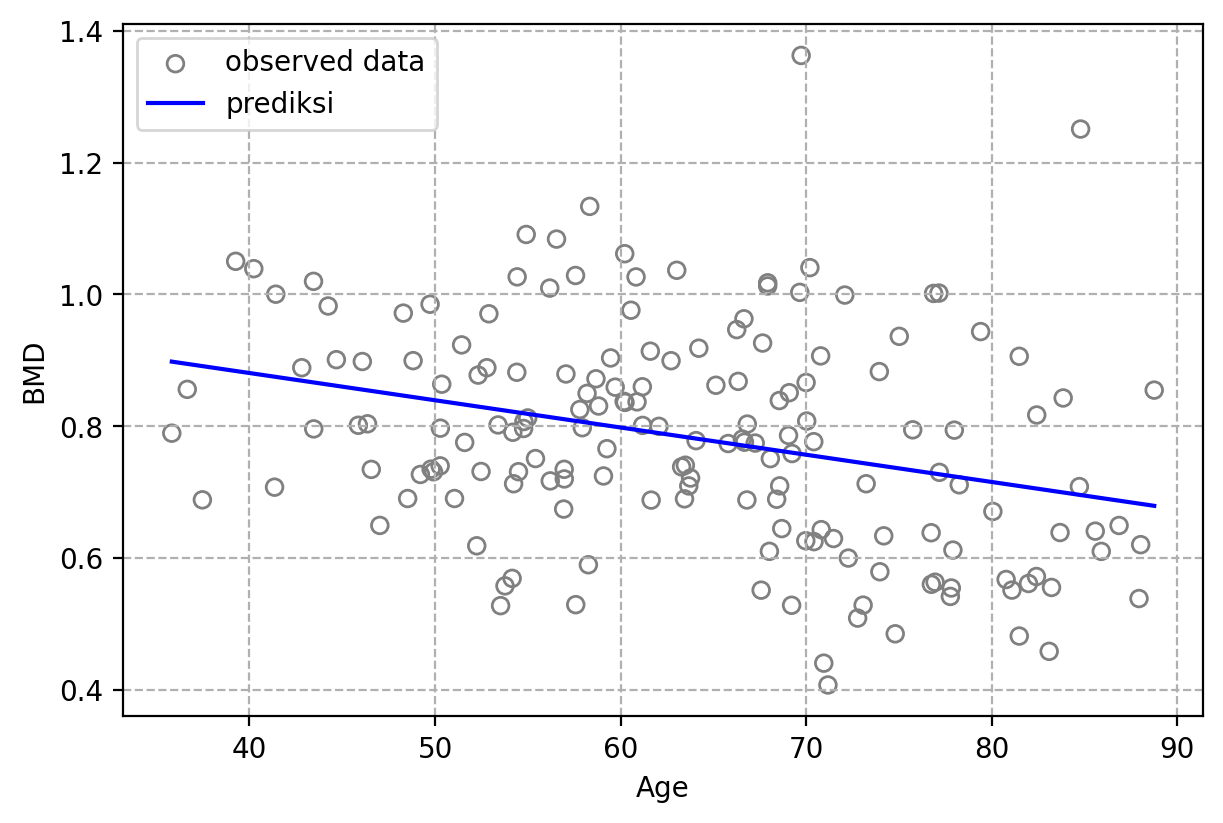

In [4]:
# Prepare data
df = pd.read_csv('../../data/raw/bmd.csv')
X_train = df[['age']]
y_train = df['bmd']
X_test = X_train.copy() + 1e-6

# Create prediction
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, dpi=200)

ax.scatter(X_train, y_train, c="none", edgecolors='grey', label="observed data")
idx_sort = np.argsort(X_test['age']).to_list()
X_test_sorted = X_test.loc[idx_sort]
y_pred_sorted = y_pred[idx_sort]
ax.plot(X_test_sorted['age'], y_pred_sorted, c='b', label="prediksi")

ax.legend()
ax.grid(linestyle="--")
ax.set_xlabel("Age")
ax.set_ylabel("BMD")
plt.show()